# Ensemble(Voting, Bagging, RandomForest) 실습

## Voting

아래의 실습 코드는 https://excelsior-cjh.tistory.com/166 를 참고하여 구성하였다. 

이번에는 데이터셋을 임의로 만들어서 진행을 해본다. make moons라는 데이터셋을 이용해서 특정 갯수의 데이터를 만들어 낼 수 있다.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

voting 알고리즘의 경우, 여러개의 서로 다른 알고리즘을 이용해서 다수결 원칙으로 결과를 나타내는 알고리즘이다. 사용될 알고리즘은 로지스틱, SVC, decision tree를 이용하였다.

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', DecisionTr...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

voting 알고리즘은 방법을 hard로 하여, 다수결원칙을 따르도록 만들었다. 아래는 사용된 모델의 각 성능을 나타낸다.

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.86
DecisionTreeClassifier 0.8866666666666667
SVC 0.9133333333333333
VotingClassifier 0.8866666666666667


E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to av

다음은 voting 방식을 soft한 방법으로 진행한다. soft voting이란, 절대적 다수결이 아닌 각 모델의 가중치를 주어 그 가중치에 해당하는 결과로 예측을 하는 모형이다.

In [6]:
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
svm_clf = SVC(probability=True,random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', DecisionTr...'rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [7]:
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.86
DecisionTreeClassifier 0.8866666666666667
SVC 0.9133333333333333
VotingClassifier 0.9


E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\SW\anaconda3\envs\bigdatatest\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to av

## 배깅(Bagging)

기존의 decision tree와 bagging을 이용한 방식의 비교를 위해 두가지 모두 구현한다. 

In [8]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.8533333333333334


In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.9266666666666666


각 결과를 차트로 표현해보기 위해 아래와 같이 함수를 구현하였다. 이는 참고한 사이트의 함수를 사용하였다.

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

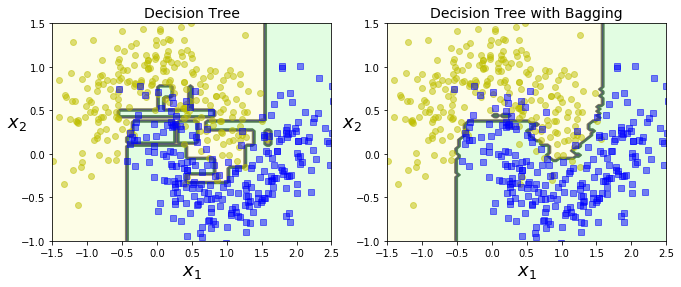

In [12]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging", fontsize=14)
plt.show()

위의 결과를 살펴보면, Decision tree의 경우 depth제한 없이 모든 잎 노드가 pure 할 때까지 진행한다. 그러므로 좌측의 그림에서 파란색 데이터를 설명하기 위해 촘촘하게 조건들이 구분되어 있는 것을 확인 할 수 있다. Bagging은 총 500개의 decision tree들의 평균치를 나타내므로, 경계선이 좀 더 smooth 하게 표현되는 것을 알 수 있다.

### Random Patch & Random subspace

random patch와 random subsapce는 변수를 샘플링 하는 방법으로, bagging에서 제공하는 파라미터 중 'max_features'와 'bootstrap_features'로 적용해볼 수 있다. 이 두가지를 이용할 경우, 각 모델은 랜덤하게 선택된 변수로 학습을 진행할 수 있다.

- random patch : 데이터와 변수 모두 샘플링(bootstrapping)하는 방식이므로, 'bootstrap = True' 와 'bootstrap_features= True'로 설정한다.
- random subspace : 변수만 샘플랑 하는 방식으로, 'bootstrap = False' 와 'bootstrap_features= True'로하고 'max_features' 는 1보다 작은값을 한다.

## Random Forest

아래는 https://datascienceschool.net/view-notebook/766fe73c5c46424ca65329a9557d0918/ 을 참고하였다.

랜덤포레스트는 scikit-learn에 잘 구현되어있으므로 이를 이용한다.
이제까지 반복적으로 해왔던 작업을 그대로 수행하면된다. 기존의 decision tree와 random forest를 비교해보기위해 두가지 모델을 모두 fitting한다

아래에서 시각화를 위해서 iris 데이터 중 2개의 변수만을 이용해서 진행해본다.

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

두 모델의 정확도 차이를 확인한다.

In [15]:
y_pred  = dt.predict(X_test)
print('Decision Tree Accuracy =', accuracy_score(y_test, y_pred))
y_pred  = rf.predict(X_test)
print('Random forest Accuracy =', accuracy_score(y_test, y_pred))

Decision Tree Accuracy = 0.9555555555555556
Random forest Accuracy = 0.9777777777777777


분류결과를 시각적으로 표현해보기 위해서 다음과 같이 차트를 그려서 두 모델의 차이를 확인해본다.

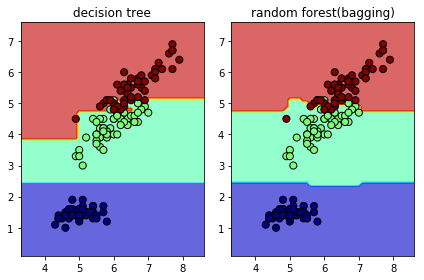

In [16]:
import matplotlib as mpl
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("decision tree")
plt.subplot(122)
Z2 = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("random forest(bagging)")

plt.tight_layout()
plt.show()

random forest의 장점 중 하나는 각 독립변수의 중요도를 계산할 수 있다. 알고리즘에 사용된 모든 노드에 대해 어떤 독립변수를 사용하고, 그 노드에서 얻은 정보 이득을 구할 수 있으므로, 이들의 평균치를 통해 변수들의 중요도를 확인 할 수 있다.

In [17]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


### [추가] 이미지 데이터의 픽셀 중요도 확인

이미지 데이터를 이용해서 random forest를 진행하고, 각 픽셀별 중요도를 시각화해본다. 데이터는 SVM 에서 사용했던 fetch_lfw_people 데이터를 활용해본다.

In [18]:
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people(min_faces_per_person=60)

X = data.data
y = data.target


데이터를 분할하고 학습을 실행한다. 아래와 같이 진행하면 다소 시간이 소요될 수 있다.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

테스트에 대한 정확도 결과를 출력한다


In [20]:
print(forest.score(X_test,y_test))

0.6271604938271605


학습된 결과의 변수별 중요도를 확인하기 위해 시각화를 한다. 각 변수는 해당 그림에서의 각 픽셀을 의미한다. 학습된 모델의 feature_importances 는 1차원 벡터로 표현되기 때문에, 아래와 같이 그림의 크기만큼 reshape과정을 진행해야 한다.

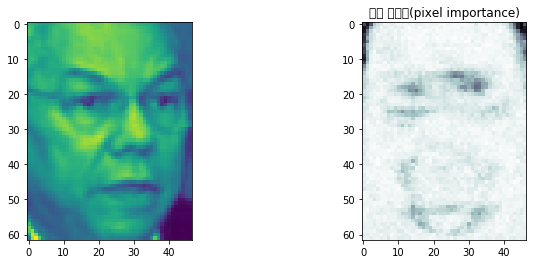

In [21]:
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.imshow(data.images[0])
plt.subplot(122)
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("픽셀 중요도(pixel importance)")
plt.show()